"IMPLEMENTASI MODEL RESNET PADA CITRA PENYAKIT DAUN DENGAN METODE JARINGAN SYARAF KONVOLUSIONAL (CNN)" oleh Muhammad Jafar Shodiq (21120116130052)

# Mengimport Library dan Mendefinisikan Variabel

In [1]:
#mengimport direktori dari google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#menghitung total waktu jalannya program
import time
total_time = time.time()

#mengabaikan peringatan
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#membuat data latih dan data uji
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import os
import cv2
import numpy as np
import random as rn
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#membangun model
from tensorflow.python.keras.applications.resnet import ResNet50, ResNet101, ResNet152
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.python.keras import optimizers

#visualisasi dan pengujian
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix

Using TensorFlow backend.


In [0]:
Apple___Apple_scab_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Apple___Apple_scab'
Apple___Black_rot_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Apple___Black_rot'
Grape___Black_rot_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Grape___Black_rot'
Grape___Esca_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Grape___Esca_(Black_Measles)'
Grape___Leaf_blight_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
Potato___Early_blight_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Potato___Early_blight'
Potato___Late_blight_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Potato___Late_blight'
Tomato___Bacterial_spot_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Tomato___Bacterial_spot'
Tomato___Septoria_leaf_spot_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Tomato___Septoria_leaf_spot'
Tomato___Target_Spot_DIR = '/content/drive/My Drive/Dataset/plantdisease-tugasakhir(experiment)/Tomato___Target_Spot'

X = []
Z = []

NUM_CLASSES = 10
CHANNELS = 3
IMG_SIZE = 224
BATCH_SIZE = 32
RANDOM_STATE = 42
NUM_EPOCHS = 5

RESNET_POOLING = 'avg'
RESNET_WEIGHTS = 'imagenet'
DENSE_LAYER_ACTIVATION = 'relu'
OUTPUT_DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'
LOSS_METRICS = ['accuracy']

#yang akan diubah-ubah
TEST_SIZE = 0.1
LEARNING_RATE = 0.001

# Membuat Data Latih dan Data Uji

In [0]:
def assign_label(img, plantdisease_type):
    return plantdisease_type
    
def make_train_data(plantdisease_type, DIR):
    for img in tqdm(os.listdir(DIR)): #tqdm untuk progress bar
        label = assign_label(img, plantdisease_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR) #membaca file gambar yang ada di masing-masing path
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) #mengubah ukuran gambar menjadi 224x224
        
        X.append(np.array(img)) #menambahkan dan mengubah gambar menjadi array
        Z.append(str(label)) #menambahkan kelas/kategori

In [5]:
#menghitung waktu
make_data_time = time.time()
#memproses data yang akan digunakan
make_train_data('Keropeng_Apel', Apple___Apple_scab_DIR)
print(len(X))
make_train_data('Busuk_Hitam_Apel', Apple___Black_rot_DIR)
print(len(X))
make_train_data('Busuk_Hitam_Anggur', Grape___Black_rot_DIR)
print(len(X))
make_train_data('Esca_Anggur', Grape___Esca_DIR)
print(len(X))
make_train_data('Hawar_Daun_Anggur', Grape___Leaf_blight_DIR)
print(len(X))
make_train_data('Bercak_Kering_Kentang', Potato___Early_blight_DIR)
print(len(X))
make_train_data('Hawar_Daun_Kentang', Potato___Late_blight_DIR)
print(len(X))
make_train_data('Bercak_Bakteri_Tomat', Tomato___Bacterial_spot_DIR)
print(len(X))
make_train_data('Bercak_Septoria_Tomat', Tomato___Septoria_leaf_spot_DIR)
print(len(X))
make_train_data('Bercak_Coklat_Tomat', Tomato___Target_Spot_DIR)
print(len(X))
make_data_time_spent = time.time()-make_data_time

  0%|          | 0/50 [00:00<?, ?it/s]

50


  2%|▏         | 1/50 [00:00<00:07,  6.83it/s]

100


  0%|          | 0/50 [00:00<?, ?it/s]

150


  0%|          | 0/50 [00:00<?, ?it/s]

200


  0%|          | 0/50 [00:00<?, ?it/s]

250


  0%|          | 0/50 [00:00<?, ?it/s]

300


  2%|▏         | 1/50 [00:00<00:08,  5.47it/s]

350


  0%|          | 0/50 [00:00<?, ?it/s]

400


  0%|          | 0/50 [00:00<?, ?it/s]

450


100%|██████████| 50/50 [00:12<00:00,  3.98it/s]

500


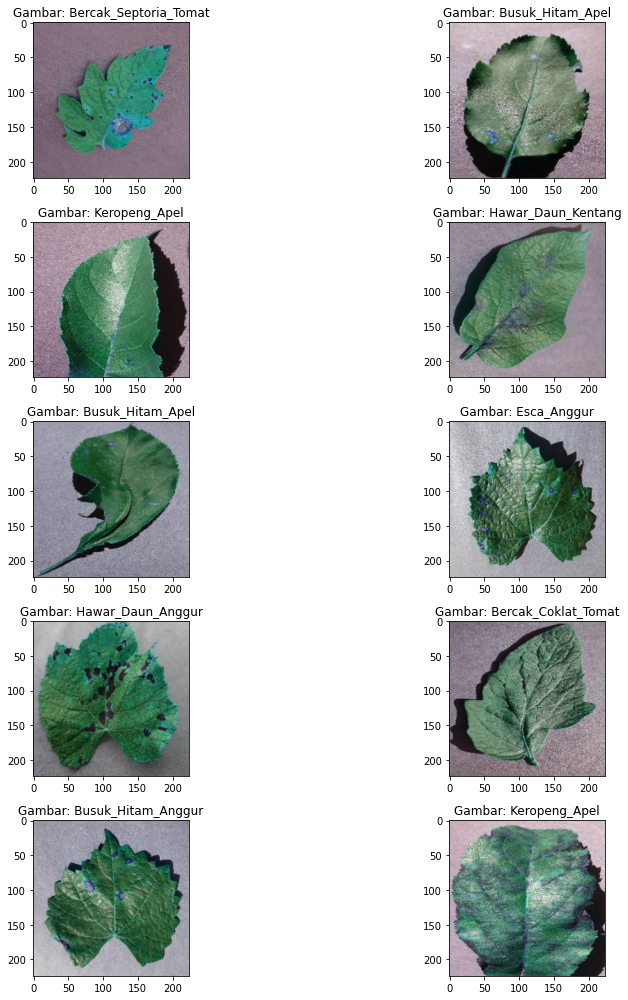

In [6]:
#menampilkan sampel secara acak
fig,ax = plt.subplots(5, 2)
fig.set_size_inches(14, 14)
for i in range(5):
    for j in range (2):
        l = rn.randint(0, len(Z))
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('Gambar: '+Z[l])     
plt.tight_layout()

In [0]:
#mengubah kelas/kategori menjadi angka 0-9
le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, NUM_CLASSES)
#normalisasi nilai piksel dengan membagi semua nilai dengan 255
X = np.array(X)
X = X/255

In [0]:
#membagi data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(450, 224, 224, 3)
(450, 10)
(50, 224, 224, 3)
(50, 10)


In [0]:
#menambahkan random seed
np.random.seed(RANDOM_STATE)
rn.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

# Membuat Model

In [11]:
#mengunduh model resnet
resnet_model = ResNet50(include_top=False, pooling=RESNET_POOLING, weights=RESNET_WEIGHTS, input_shape = (IMG_SIZE, IMG_SIZE, CHANNELS))

94773248/94765736 [==============================] - 1s 0us/step


In [0]:
#membangun model
model=Sequential()
model.add(resnet_model)
model.add(BatchNormalization())
model.add(Dense(256, activation = DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(128, activation = DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(64, activation = DENSE_LAYER_ACTIVATION))
model.add(BatchNormalization())
model.add(Dense(NUM_CLASSES, activation = OUTPUT_DENSE_LAYER_ACTIVATION))
model.layers[0].trainable=False

In [0]:
#compile model
ADAM = tf.keras.optimizers.Adam(lr = LEARNING_RATE)
model.compile(optimizer = ADAM, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [14]:
#melihat lapisan, bentuk lapisan, dan jumlah parameter
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

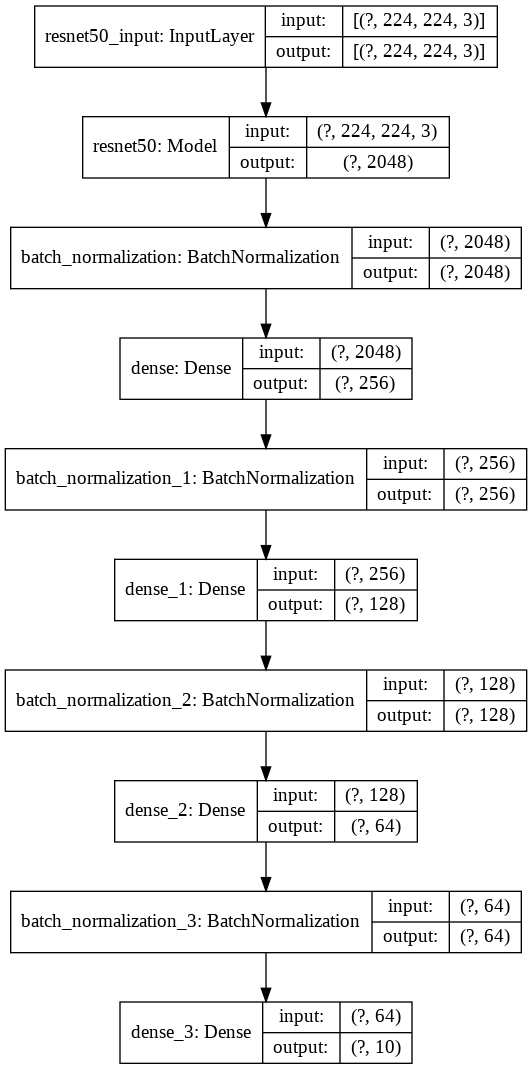

In [15]:
#menampilkan arsitektur model
keras.utils.plot_model(model, "model_architecture.png", show_shapes=True)

In [16]:
#menghitung waktu
train_time = time.time()
#melatih data
fit_history = model.fit(x_train, y_train,
                        epochs = NUM_EPOCHS,
                        batch_size = BATCH_SIZE,
                        validation_data = (x_test, y_test))
train_time_spent = time.time()-train_time

Epoch 1/5
15/15 [==============================] - 35s 2s/step - loss: 2.0943 - accuracy: 0.3200 - val_loss: 2.3614 - val_accuracy: 0.0200
Epoch 2/5
15/15 [==============================] - 34s 2s/step - loss: 1.2159 - accuracy: 0.6044 - val_loss: 2.3554 - val_accuracy: 0.1600
Epoch 3/5
15/15 [==============================] - 34s 2s/step - loss: 0.8621 - accuracy: 0.7378 - val_loss: 2.3677 - val_accuracy: 0.1400
Epoch 4/5
15/15 [==============================] - 34s 2s/step - loss: 0.6783 - accuracy: 0.8289 - val_loss: 2.4195 - val_accuracy: 0.0400
Epoch 5/5
15/15 [==============================] - 34s 2s/step - loss: 0.5799 - accuracy: 0.8533 - val_loss: 2.3871 - val_accuracy: 0.1800


In [17]:
#mengevaluasi hasil latih
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Akurasi Data Uji:', test_acc)

2/2 - 1s - loss: 2.3871 - accuracy: 0.1800
Akurasi Data Uji: 0.18000000715255737


# Memvisualisasikan dan Menguji Model

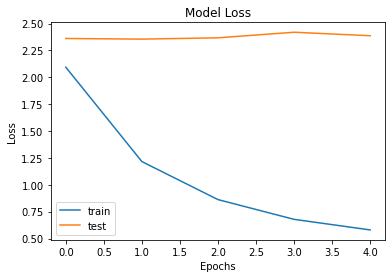

In [18]:
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

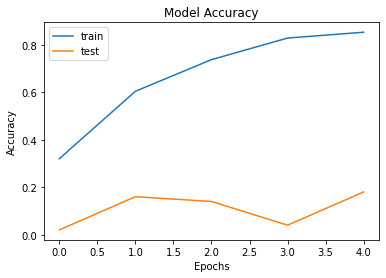

In [19]:
plt.plot(fit_history.history['accuracy'])
plt.plot(fit_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Experimenting

In [0]:
import matplotlib.image as mpimg
from keras.preprocessing.image import image

                           precision    recall  f1-score   support

        (0) Keropeng_Apel       0.00      0.00      0.00         8
     (1) Busuk_Hitam_Apel       0.00      0.00      0.00         8
   (2) Busuk_Hitam_Anggur       0.14      1.00      0.25         1
          (3) Esca_Anggur       0.00      0.00      0.00         5
    (4) Hawar_Daun_Anggur       0.00      0.00      0.00         3
(5) Bercak_Kering_Kentang       0.19      1.00      0.31         8
   (6) Hawar_Daun_Kentang       0.00      0.00      0.00         4
 (7) Bercak_Bakteri_Tomat       0.00      0.00      0.00         2
(8) Bercak_Septoria_Tomat       0.00      0.00      0.00         4
  (9) Bercak_Coklat_Tomat       0.00      0.00      0.00         7

                 accuracy                           0.18        50
                macro avg       0.03      0.20      0.06        50
             weighted avg       0.03      0.18      0.06        50



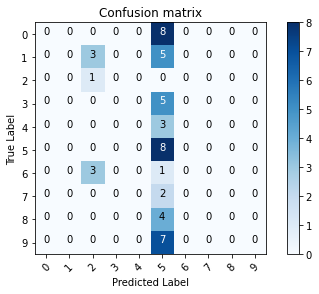

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

target_names=['(0) Keropeng_Apel',
              '(1) Busuk_Hitam_Apel',
              '(2) Busuk_Hitam_Anggur',
              '(3) Esca_Anggur',
              '(4) Hawar_Daun_Anggur',
              '(5) Bercak_Kering_Kentang',
              '(6) Hawar_Daun_Kentang',
              '(7) Bercak_Bakteri_Tomat',
              '(8) Bercak_Septoria_Tomat',
              '(9) Bercak_Coklat_Tomat']
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(NUM_CLASSES))
print(classification_report(Y_true, Y_pred_classes, target_names = target_names))

In [64]:
from google.colab import files
import matplotlib.image as mpimg
from keras.preprocessing.image import image

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

predictions_load = model.predict(x)

Saving 0ba474dd-0cfd-4fd2-a58c-8e3d18dbe7c3___JR_HL 8395.JPG to 0ba474dd-0cfd-4fd2-a58c-8e3d18dbe7c3___JR_HL 8395.JPG


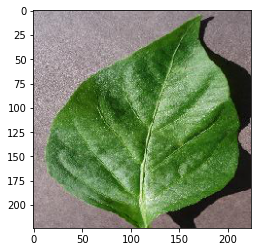

In [65]:
plt.imshow(img)

[0.03904836 0.23639672 0.31354043 0.0805188  0.03085137 0.01705458
 0.00512646 0.01567549 0.00259739 0.25919044]
Busuk Hitam Anggur


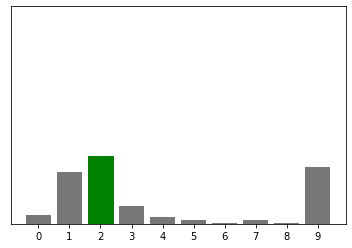

In [72]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('green')

probabilitas = predictions_load[0]
kategori = np.argmax(predictions_load[0])
if kategori == 0: kategori = 'Keropeng Apel'
if kategori == 1: kategori = 'Busuk Hitam Apel'
if kategori == 2: kategori = 'Busuk Hitam Anggur'
if kategori == 3: kategori = 'Esca Anggur'
if kategori == 4: kategori = 'Hawar Daun Anggur'
if kategori == 5: kategori = 'Bercak Kering Kentang'
if kategori == 6: kategori = 'Hawar Daun Kentang'
if kategori == 7: kategori = 'Bercak Bakteri Tomat'
if kategori == 8: kategori = 'Bercak Septoria Tomat'
if kategori == 9: kategori = 'Bercak Coklat Tomat'

print(probabilitas)
print(kategori)
try:
  plot_value_array(1, predictions_load[0], y_test)
  _ = plt.xticks(range(10), class_names, rotation=45)
except Exception as e: pass